In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
X, y = boston.data, boston.target
X.shape, y.shape

((506, 13), (506,))

0


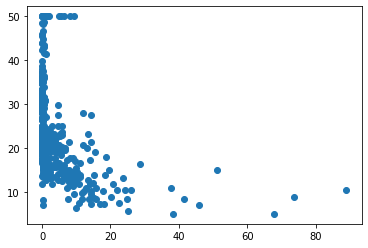

1


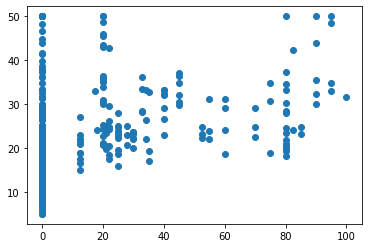

2


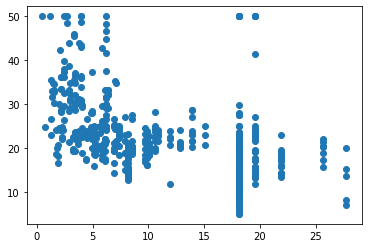

3


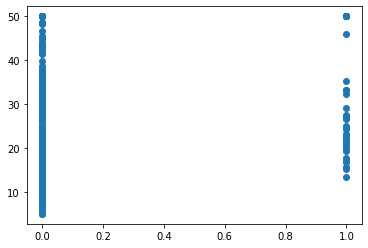

4


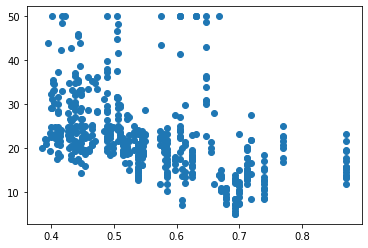

5


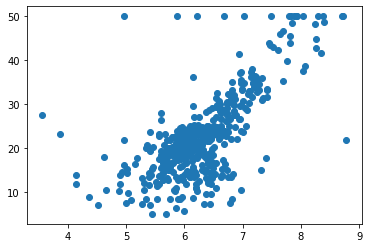

6


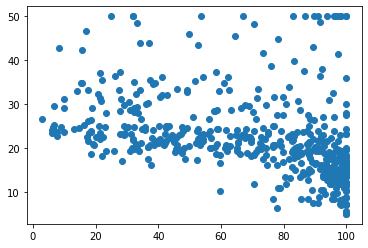

7


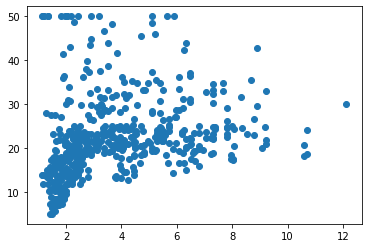

8


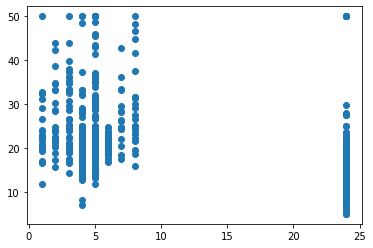

9


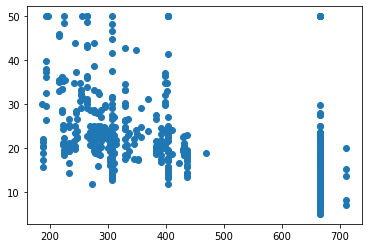

10


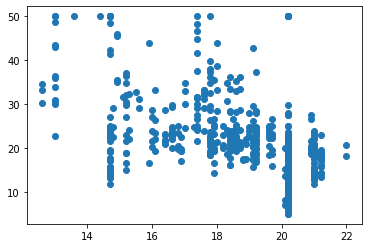

11


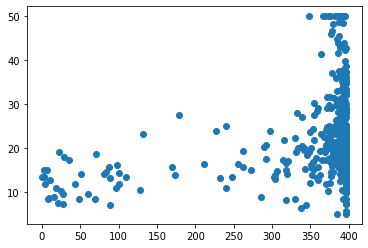

12


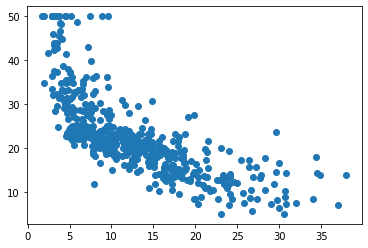

In [3]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

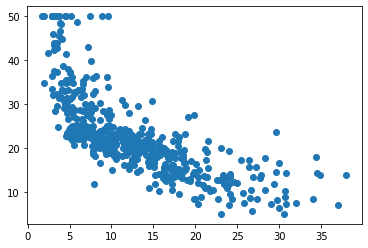

In [4]:
X12 = X[:,12:13]
plt.scatter(X12,y)
plt.show()

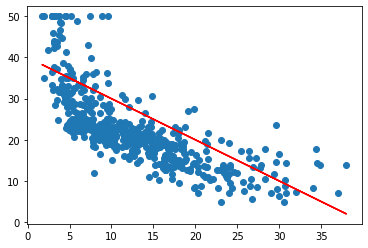

In [5]:
def modelo_linear(X, a, b):
    y = a*X + b
    return y
ypred = modelo_linear(X12, -1, 40)
plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

In [6]:
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae
ypred = modelo_linear(X12, -1, 40)
mae(y, ypred)

array([6.96547431])

In [7]:
def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return mse
ypred = modelo_linear(X12, -1, 40)
mse(y, ypred)

array([61.78580296])

In [8]:
from math import sqrt
def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

7.860394580708203

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

7.860394580708203

24.334069059572577
6.20346413306178


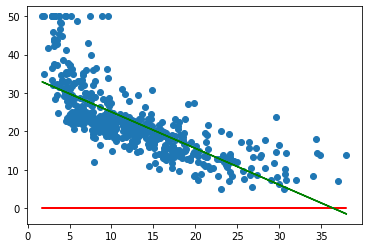

array([[34.55355094],
       [-0.95003172]])

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()
modelo.w

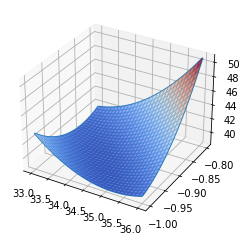

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

plt.show()

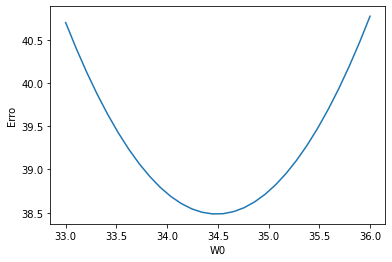

In [12]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

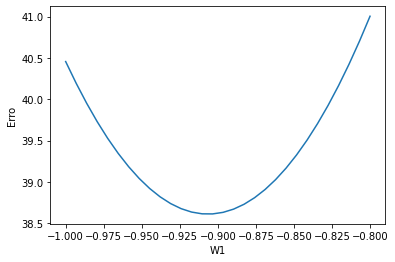

In [13]:
plt.ylabel("Erro")
plt.xlabel("W1")
i=8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

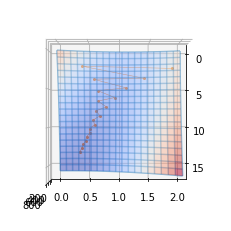

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(20):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0], self.w[1,0], mse])

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

In [18]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.w)

38.48296725018393
[[34.55355094]
 [-0.95003172]]


In [19]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

38.48296722989415
34.5538408793831 [-0.95004935]


In [20]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

21.894831181729202
36.459488385090125 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
